In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape

(1599, 12)

<Axes: xlabel='quality', ylabel='Count'>

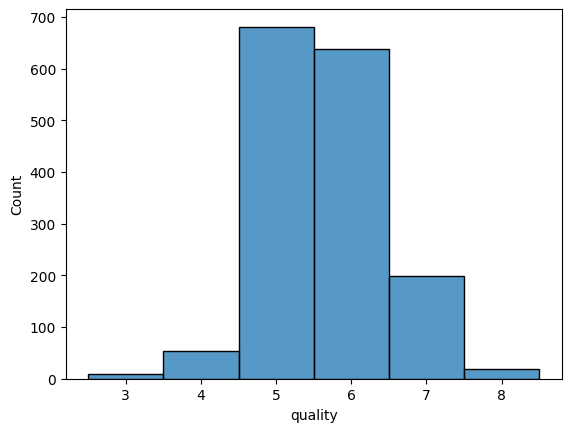

In [5]:
sns.histplot(x = "quality", data = df, discrete=True)

<Axes: xlabel='fixed acidity', ylabel='quality'>

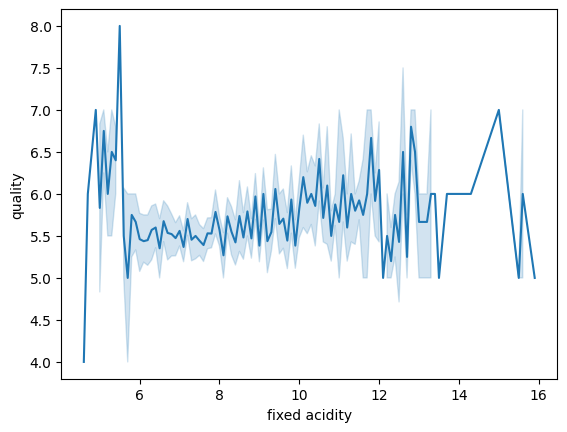

In [6]:
sns.lineplot(x = "fixed acidity", y = "quality", data = df)

<Axes: xlabel='alcohol', ylabel='Count'>

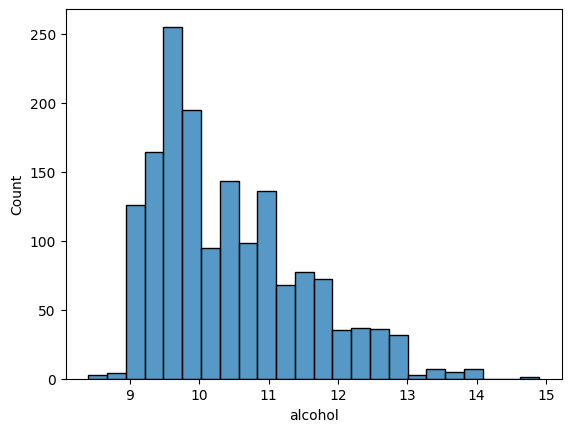

In [7]:
sns.histplot(x = "alcohol", data = df)

<Axes: xlabel='volatile acidity', ylabel='quality'>

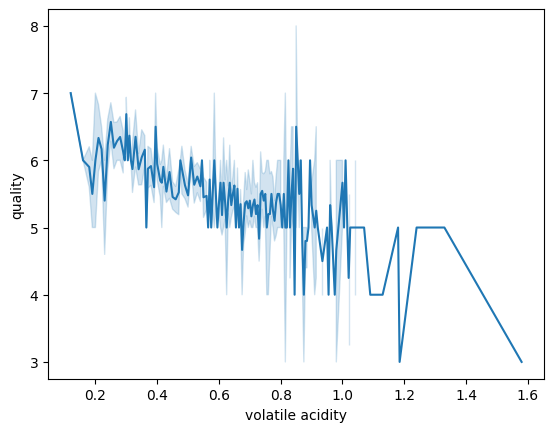

In [8]:
sns.lineplot(x = "volatile acidity", y = "quality", data = df)

<Axes: xlabel='pH', ylabel='Count'>

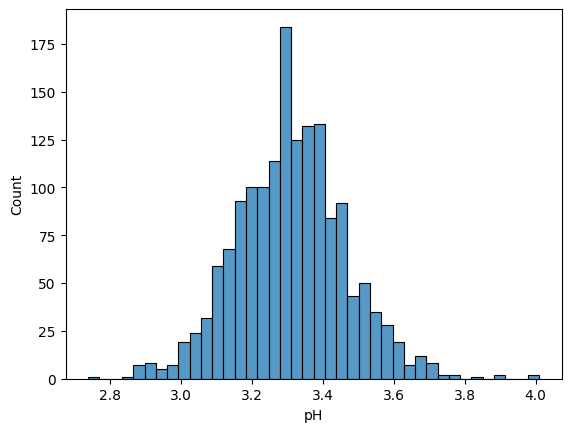

In [9]:
sns.histplot(x = "pH", data = df)

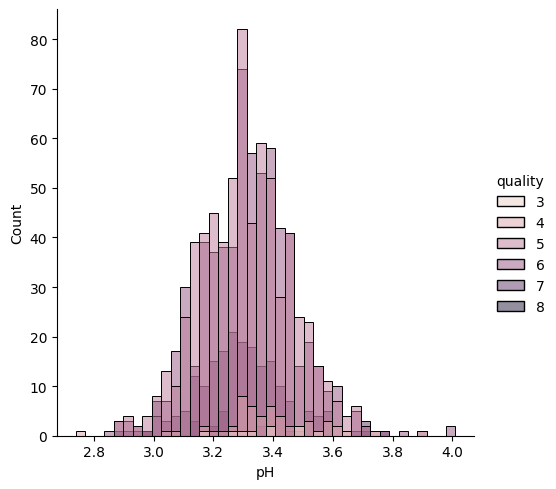

In [10]:
sns.displot(x = "pH",hue = "quality", data = df)

<Axes: xlabel='alcohol', ylabel='pH'>

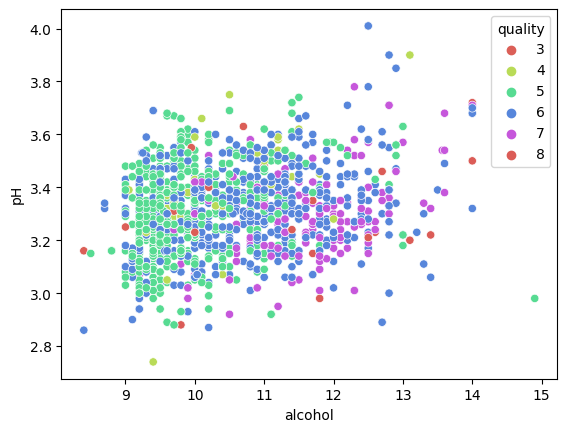

In [11]:
sns.scatterplot(x = "alcohol", y = "pH", hue = "quality", data = df,  palette="hls", legend = "full")

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.groupby("quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [14]:
x = df.drop("quality", axis = 1)
y = df["quality"]

In [15]:
x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [18]:
x_train.shape, x_test.shape

((1439, 11), (160, 11))

In [19]:
model = RandomForestClassifier(n_estimators= 100, criterion="entropy")

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [21]:
prediction = model.predict(x_test)

In [22]:
prediction

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 7, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 6], dtype=int64)

In [23]:
accuracy_score(prediction, y_test)*100

73.125